In [2]:
import gpflow
import numpy as np
from src.utils import create_dataset, plot_matrix, plot_matrix_cv
from sklearn.model_selection import KFold
from src.models.kernels import LambdaRBF
from src.models.models import GPRLasso
from src.models.validation import measure_mnll, measure_rmse, kfold_cv_model

2023-04-13 11:51:34.276986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset: Yacht

In [3]:
X_train, Y_train,  X_test, Y_test, Y_train_mean, Y_train_std = create_dataset('yacht', 0)
D = X_train.shape[1]

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(21,)",float64,"[0.40825, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
RMSE: Train=0.011 Test=0.020
MNLL: Train=-0.071 Test=1.364


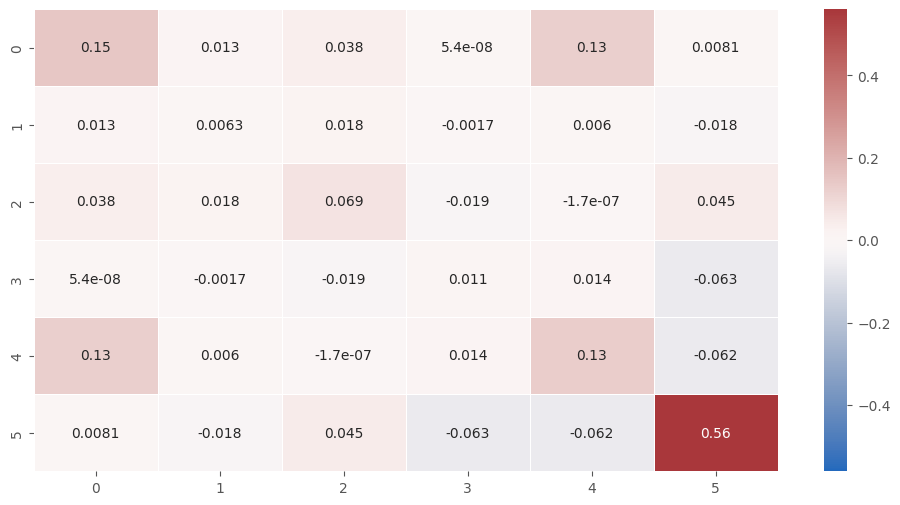

In [4]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X_train, Y_train), kernel=LRBF, lasso=10)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())
train_rmse_stan, test_rmse_stan = measure_rmse(gpr_lasso_LRBF, X_train, Y_train, X_test, Y_test)
train_mnll, test_mnll = measure_mnll(gpr_lasso_LRBF, X_train, Y_train, Y_train_std, X_test, Y_test)
print('RMSE: Train=%.3f Test=%.3f'%(train_rmse_stan, test_rmse_stan))
print('MNLL: Train=%.3f Test=%.3f'%(train_mnll, test_mnll))

In [5]:
X, Y = create_dataset('yacht', 0, False)

In [25]:
kfolds = KFold(n_splits = 8, shuffle=True, random_state=0)
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': 0.1, 'tol_sparsity': 0.1}
results_GPR_LRBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='LRBF', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: LRBF; --
Average test RMSE: 0.031
Average test MNLL: 1.510



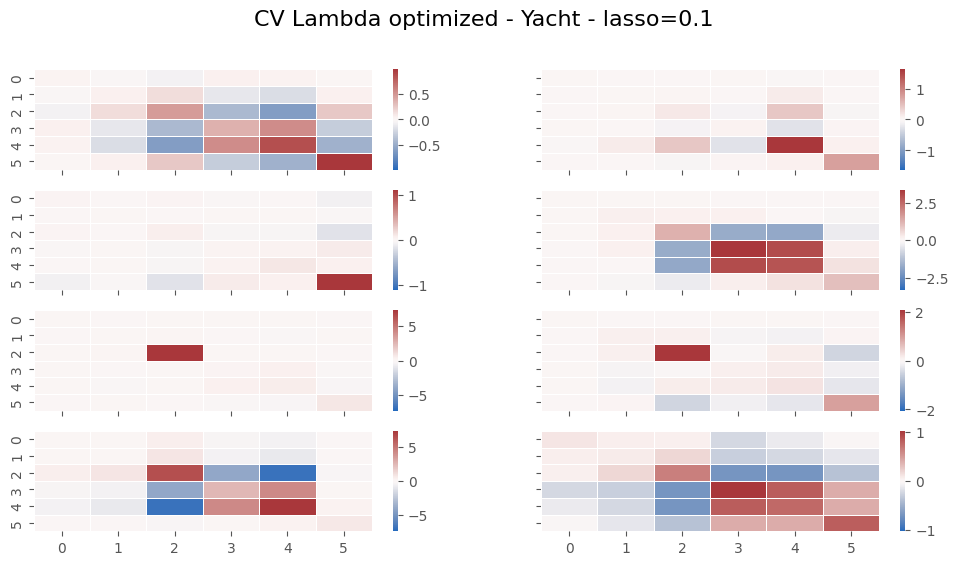

In [26]:
plot_matrix_cv(results_GPR_LRBF['Lambda'], info={'dataset':'Yacht', 'lasso':model_params['lasso']})

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(21,)",float64,"[0.40825, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


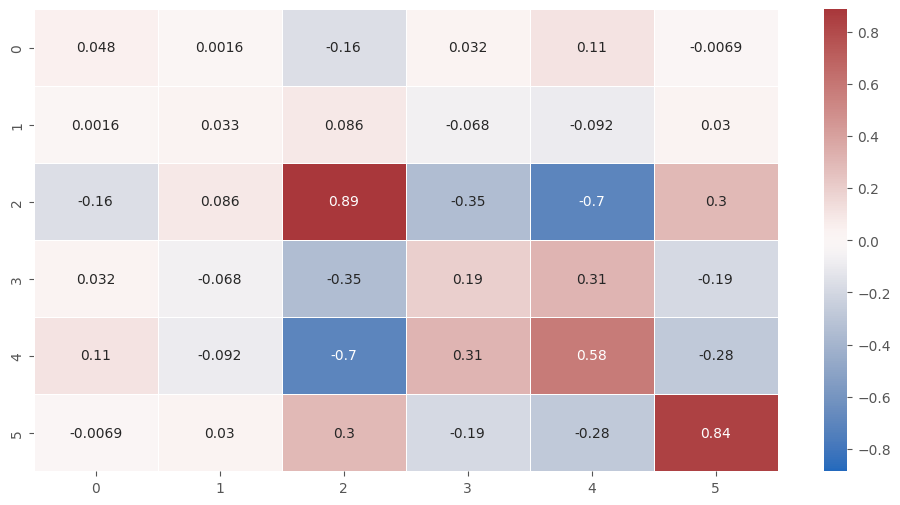

In [28]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X, Y), kernel=LRBF, lasso=0.1)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())